Analyze the HP par space for different solutions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
HPparspaces = np.zeros((27,40,40))

for i in range(len(HPparspaces)):
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice.dat'%i)
    parspace = np.swapaxes(parspace,1,0)
    HPparspaces[i] = parspace

In [6]:
LBmin = 0
LBmax = 1
LBstep = .025
par1_res = np.arange(LBmin,LBmax,LBstep)
par2_res = par1_res

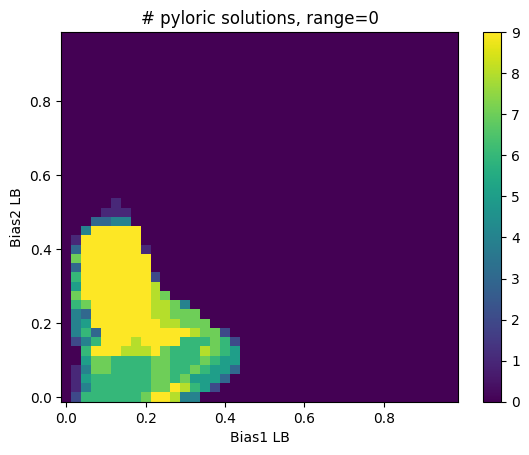

In [5]:
plt.pcolormesh(par1_res,par2_res,HPparspaces[19])
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0')
plt.colorbar()
plt.show()

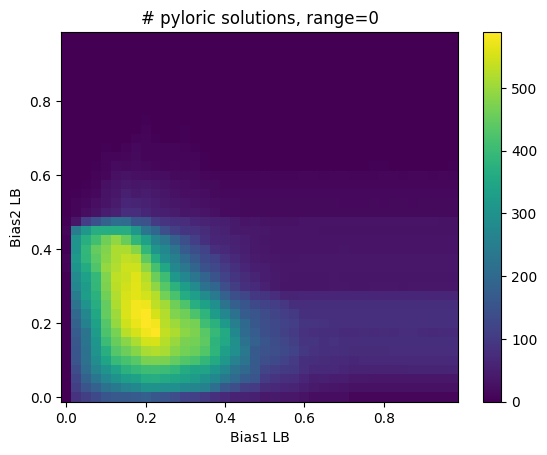

In [20]:
#amalgamate all to see if there are any trends
sumparspace = np.sum(HPparspaces,axis=0)

plt.pcolormesh(par1_res,par2_res,sumparspace)
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0')
plt.colorbar()
plt.show()

In [40]:
#how well does the best possible 0 range generalist do?
bestgeneralistidx = np.where(sumparspace==np.max(sumparspace))
bestgeneralist = np.array([par1_res[bestgeneralistidx[0][0]],par2_res[bestgeneralistidx[1][0]]])
print(bestgeneralist)
print(sumparspace[bestgeneralistidx])

[0.225 0.2  ]
[589.]


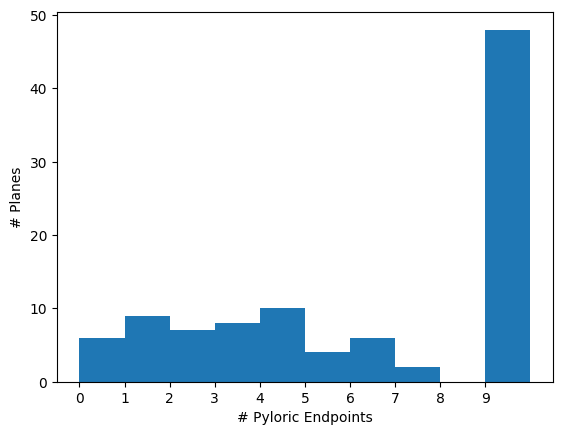

In [53]:
bestgeneralist_perf = np.zeros(100)

for i in range(len(bestgeneralist_perf)):
    bestgeneralist_perf[i] = HPparspaces[i,bestgeneralistidx[0][0],bestgeneralistidx[1][0]]

plt.hist(bestgeneralist_perf,bins = range(11))
plt.xticks(range(10))
plt.ylabel('# Planes')
plt.xlabel('# Pyloric Endpoints')
plt.show()

In [56]:
#how many solutions do not have any fully pyloric end points 

tricksters = []
nontricksters = []

for i in range(len(HPparspaces)):
    if (HPparspaces[i] == 9).any():
        nontricksters.append(i)
    else:
        tricksters.append(i)

print(len(tricksters))

35


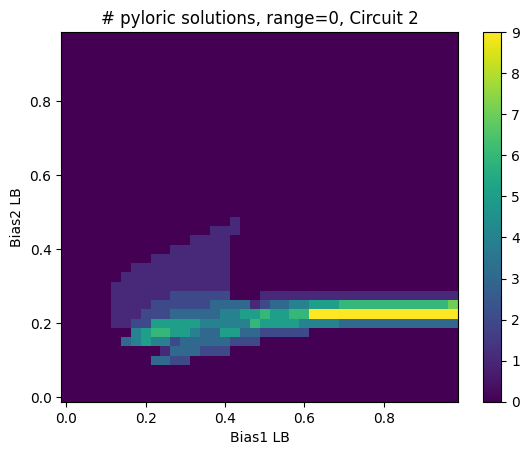

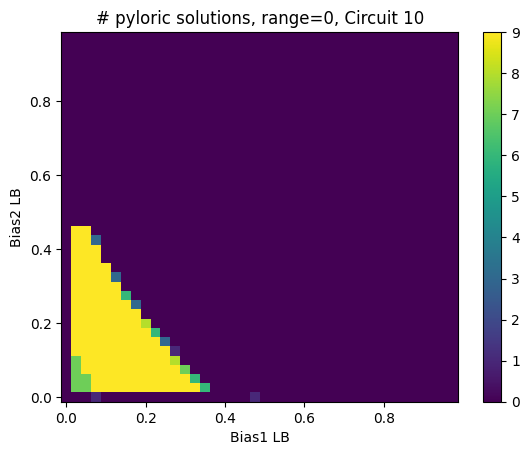

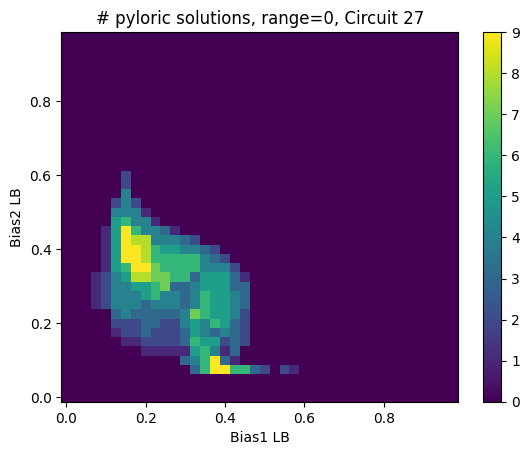

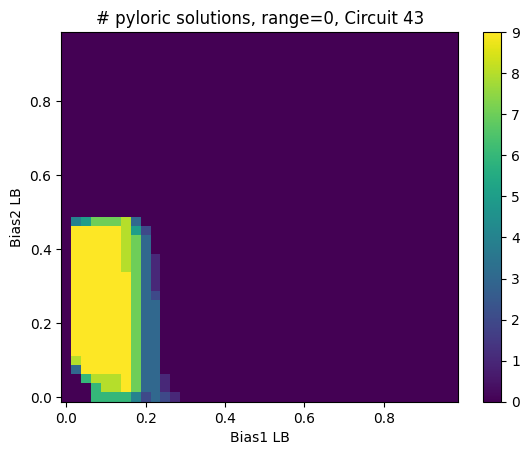

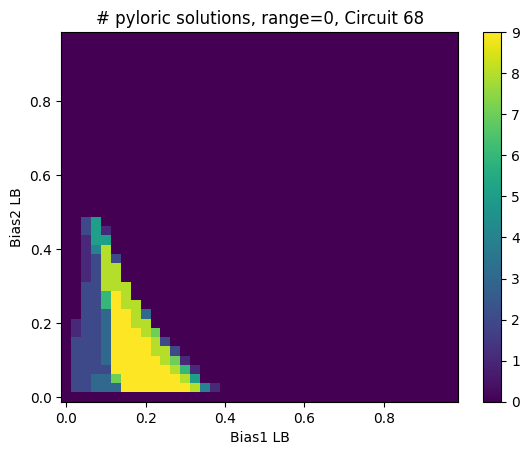

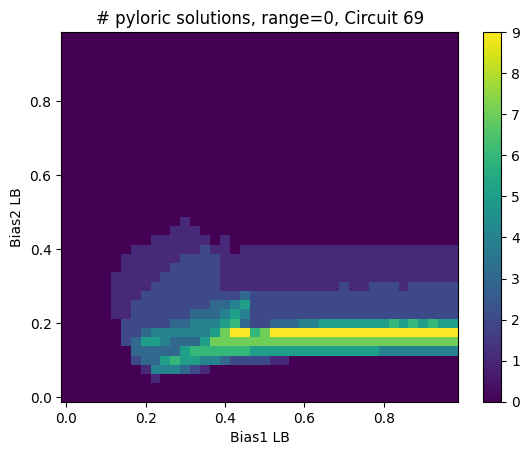

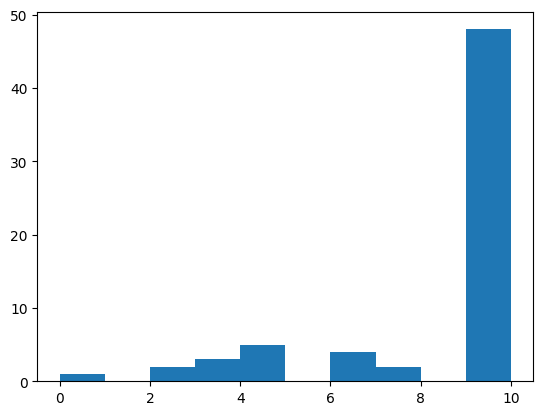

In [63]:
#out of only the solutions for which it is possible to do perfectly, how does the generalist solution do?
bestgeneralist_perf_nontricksters = np.zeros(len(nontricksters))

idx = 0
for i in nontricksters:
    bestgeneralist_perf_nontricksters[idx] = HPparspaces[i,bestgeneralistidx[0][0],bestgeneralistidx[1][0]]
    if bestgeneralist_perf_nontricksters[idx]<4:
        plt.pcolormesh(par1_res,par2_res,HPparspaces[i])
        plt.xlabel('Bias1 LB')
        plt.ylabel('Bias2 LB')
        plt.title('# pyloric solutions, range=0, Circuit %s'%i)
        plt.colorbar()
        plt.show()
    idx += 1

plt.hist(bestgeneralist_perf_nontricksters,bins=range(11))
plt.show()

Repeat the process for .1 and.2 range. Hypothesis: more solutions will have baseline good performance, even though some might take a hit for nonspecificity

In [74]:
HPparspacespoint2 = np.zeros((100,40,40))
HPparspacespoint1 = np.zeros((100,40,40))

for i in range(len(HPparspacespoint1)):
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslicerangepoint1.dat'%i)
    parspace = np.swapaxes(parspace,1,0)
    HPparspacespoint1[i] = parspace
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslicerangepoint2.dat'%i)
    parspace = np.swapaxes(parspace,1,0)
    HPparspacespoint2[i] = parspace

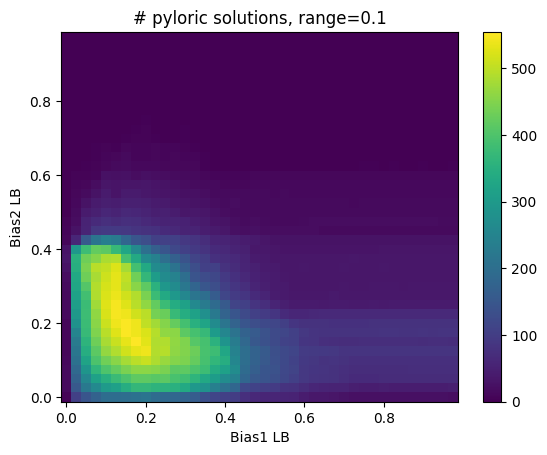

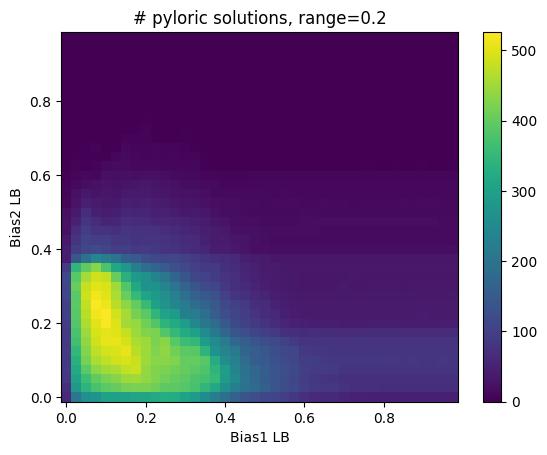

In [75]:
#amalgamate all to see if there are any trends
sumparspacepoint1 = np.sum(HPparspacespoint1,axis=0)
sumparspacepoint2 = np.sum(HPparspacespoint2,axis=0)

plt.pcolormesh(par1_res,par2_res,sumparspacepoint1)
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0.1')
plt.colorbar()
plt.show()
plt.pcolormesh(par1_res,par2_res,sumparspacepoint2)
plt.xlabel('Bias1 LB')
plt.ylabel('Bias2 LB')
plt.title('# pyloric solutions, range=0.2')
plt.colorbar()
plt.show()

In [76]:
#how well does the best possible .2 range generalist do?
bestgeneralistidxpoint1 = np.where(sumparspacepoint1==np.max(sumparspacepoint1))
bestgeneralistpoint1 = np.array([par1_res[bestgeneralistidxpoint1[0][0]],par2_res[bestgeneralistidxpoint1[1][0]]])
print(bestgeneralistpoint1)
print(sumparspacepoint1[bestgeneralistidxpoint1])
bestgeneralistidxpoint2 = np.where(sumparspacepoint2==np.max(sumparspacepoint2))
bestgeneralistpoint2 = np.array([par1_res[bestgeneralistidxpoint2[0][0]],par2_res[bestgeneralistidxpoint2[1][0]]])
print(bestgeneralistpoint2)
print(sumparspacepoint2[bestgeneralistidxpoint2])

[0.15  0.175]
[554.]
[0.225 0.1  ]
[526.]


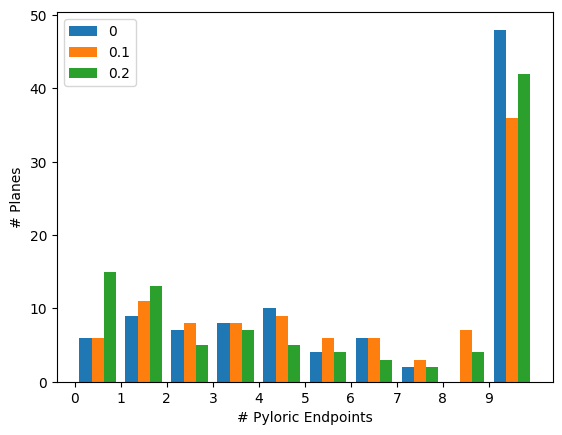

In [ ]:
bestgeneralist_perfpoint1 = np.zeros(100)
bestgeneralist_perfpoint2 = np.zeros(100)

for i in range(len(bestgeneralist_perfpoint1)):
    bestgeneralist_perfpoint1[i] = HPparspacespoint1[i,bestgeneralistidxpoint1[0][0],bestgeneralistidxpoint1[1][0]]
for i in range(len(bestgeneralist_perfpoint2)):
    bestgeneralist_perfpoint2[i] = HPparspacespoint2[i,bestgeneralistidxpoint2[0][0],bestgeneralistidxpoint2[1][0]]


plt.hist([bestgeneralist_perf,bestgeneralist_perfpoint1,bestgeneralist_perfpoint2],bins = range(11),label = [0,.1,.2])
plt.xticks(range(10))
plt.ylabel('# Planes')
plt.xlabel('# Pyloric Endpoints')
plt.legend()
plt.show()

Hypothesis is not confirmed. There were even more solutions with no or one pyloric endpoint, and only slightly more ones with eight. Will try an a intermediate range (.1)

In [9]:
viridian = '#277C5E'
xanthous = '#F8AB25'
flame = '#E46A3A'
french_gray = '#BEBFC5'
airforce_blue = '#5F8EB0'

In [7]:
#new rho version
# parspace_short = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/19/HPparslice_newrho.dat')
# parspace_short = parspace_short.swapaxes(0,1)
# parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/19/HPparslice_newrho_long.dat')
parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/26/HPparslice.dat')
parspace = parspace.swapaxes(0,1)
# parspace_long = np.zeros((len(par1_res),len(par2_res)))
# parspace_long[:,0:len(parspace[0])] = parspace


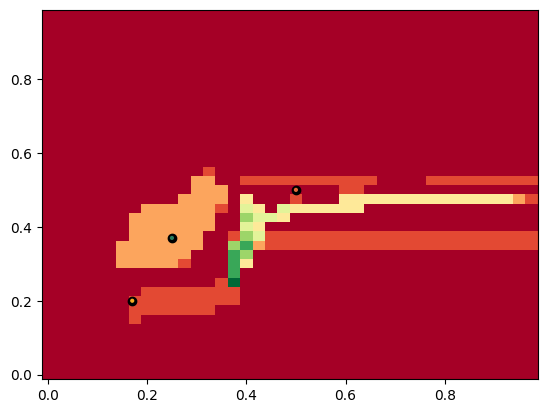

In [10]:
# plt.pcolormesh(par1_res[0:len(parspace_long[0])],par2_res,parspace_long,cmap ="RdYlGn")
plt.pcolormesh(par1_res[0:len(parspace[0])],par2_res,parspace,cmap ="RdYlGn")
# plt.xlabel(r'$\theta_{LP}$')
# plt.ylabel(r'$\theta_{PD}$')
# plt.title('# Pyloric Solutions after ADHP')
# plt.colorbar()
plt.scatter([0.17, 0.25, 0.5 ],[0.2, 0.37, 0.5],color=[xanthous,viridian,flame],s=4,zorder=4)
plt.scatter([0.17, 0.25, 0.5 ],[0.2, 0.37, 0.5],color='k',zorder=3)
plt.show()

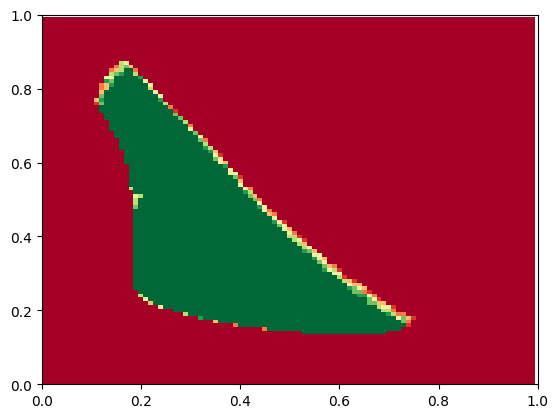

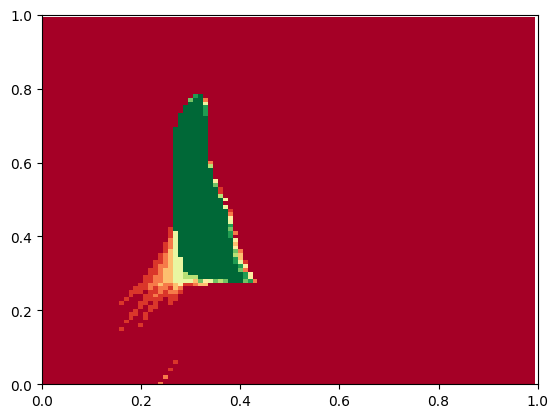

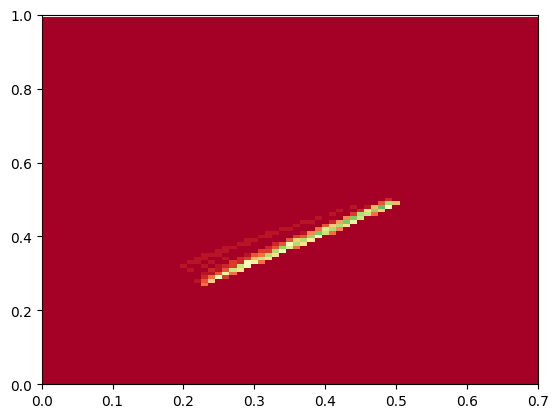

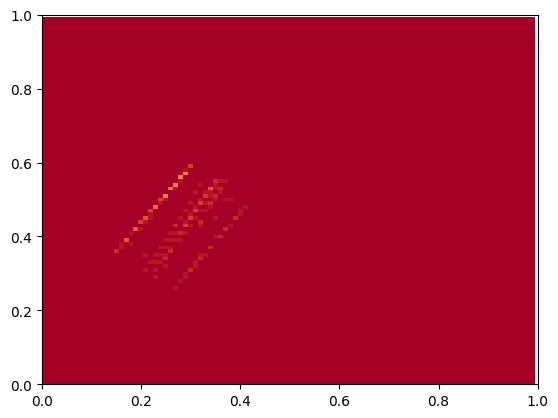

In [98]:
for i in [7,31]:
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice_newrho_long.dat'%i)
    parspace = parspace.swapaxes(0,1)
    HPparspace = np.zeros((len(par1_res),len(par2_res)))
    HPparspace[:,0:len(parspace[0])] = parspace
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.pcolormesh(par1_res,par2_res,HPparspace,cmap ="RdYlGn",vmin=0,vmax=9)
    plt.show()
for i in [2]:
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice_newrho_long.dat'%i)
    parspace = parspace.swapaxes(0,1)
    HPparspace = np.zeros((len(par1_res),len(par2_res)))
    HPparspace[:,0:len(parspace[0])] = parspace
    plt.xlim(0,.7)
    plt.ylim(0,1)
    plt.pcolormesh(par1_res,par2_res,HPparspace,cmap ="RdYlGn",vmin=0,vmax=25)
    plt.show()
for i in [34]:
    parspace = np.loadtxt('./Specifically Evolved HP mechanisms/Every Circuit/%s/HPparslice_newrho_long.dat'%i)
    parspace = parspace.swapaxes(0,1)
    HPparspace = np.zeros((len(par1_res),len(par2_res)))
    HPparspace[:,0:len(parspace[0])] = parspace
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.pcolormesh(par1_res,par2_res,HPparspace,cmap ="RdYlGn",vmin=0,vmax=25)
    plt.show()    

    